In [1]:
from typing import Dict, Any
import pathlib

from utils import dnde_photon, make_processes, process_string_to_latex, DecayProcessInfo
from utils import charged_pion
from utils import neutral_pion
from utils import muon
from utils import charged_kaon
from utils import short_kaon
from utils import long_kaon
from utils import eta
from utils import charged_rho
from utils import eta_prime
from utils import omega
from utils import phi

from hazma import spectra
from hazma import parameters

# from hazma.decay import long_kaon as long_kaon_decay
#from hazma.decay import short_kaon as short_kaon_decay

import numpy as np
import matplotlib.pyplot as plt

In [198]:
qualitative = [
    "#e41a1c",
    "#377eb8",
    "#4daf4a",
    "#984ea3",
    "#ff7f00",
    "#a65628",
    "#f781bf",
    "#999999",
    "#ffff33",
]

In [199]:
from charged_kaon import processes as charged_kaon_processes
from long_kaon import processes as long_kaon_processes
from short_kaon import processes as short_kaon_processes
from eta import processes as eta_processes
from eta_prime import processes as eta_prime_processes
from omega import processes as omega_processes
from phi import processes as phi_processes

In [200]:
def make_photon_spectrum_plot(energies, dndes: Dict[str, Any]):
    ncs = len(qualitative)
    params = {key: dict(color=qualitative[i % ncs], linewidth=1, label=process_string_to_latex(key)) for i, key in enumerate(dndes.keys())}
    params["total"] = dict(color="k", linewidth=2, alpha=0.6, label=r"$\mathrm{Total}$")

    plt.figure(dpi=150)
    for key, val in dndes.items():
        plt.plot(energies, val, **params[key])
    plt.plot(energies, sum(dndes.values()), **params["total"])
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"$\dv{N}{E_{\gamma}} \ [\mathrm{MeV}^{-1}]$", fontdict=dict(size=16))
    plt.xlabel(r"$E_{\gamma} \ [\mathrm{MeV}]$", fontdict=dict(size=16))
    plt.ylim(1e-7, 1)
    plt.xlim(np.min(es), np.max(es))
    plt.legend()

## $K^{\pm}$

In [201]:
charged_kaon_procs = make_processes(charged_kaon, charged_kaon_processes)

/home/logan/github/Hazma/hazma/spectra/_photon/__init__.py:169: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return _pion.dnde_photon_charged_pion(photon_energy, pion_energy)


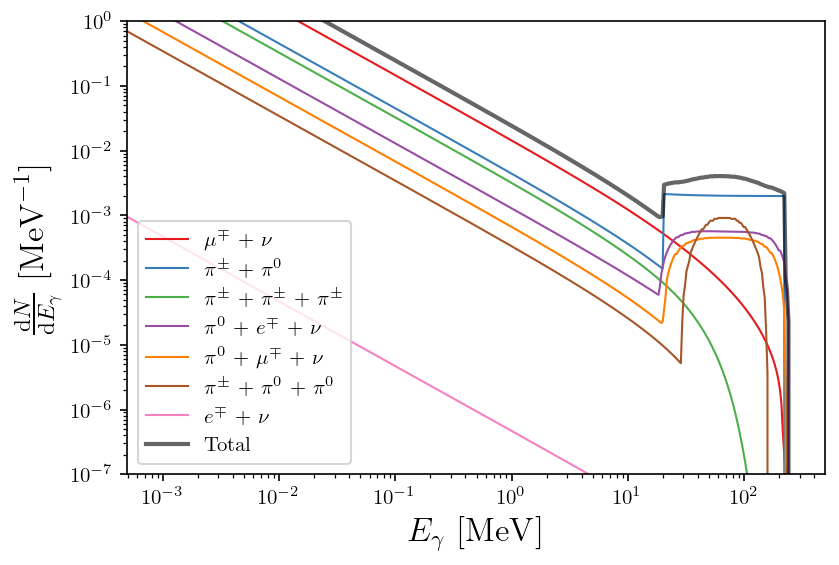

In [202]:
es = np.geomspace(charged_kaon_procs.parent.mass * 1e-6, charged_kaon_procs.parent.mass, 500)
dnde = dnde_photon(es, charged_kaon_procs)
make_photon_spectrum_plot(es, dnde)
# plt.plot(es, spectra.dnde_photon_charged_kaon(es, parameters.charged_kaon_mass), label="knew")
# plt.ylim(1e-7, 1e5)
plt.legend()

In [10]:
header = "energy," + ",".join(list(map(lambda string: "_".join(string.split(" ")), dnde.keys())))
data = np.array([es,*dnde.values()]).T
np.savetxt(
    DATA_DIR.joinpath("charged_kaon_photon.csv"), 
    data, 
    fmt="%.15e", 
    delimiter=",", 
    header=header,
)

## $K_{S}$

In [23]:
short_kaon_procs = make_processes(short_kaon, short_kaon_processes)

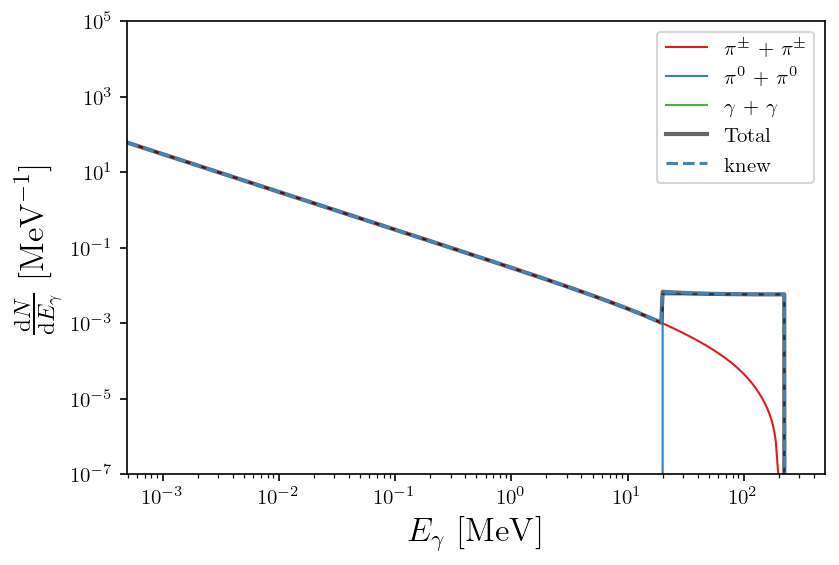

In [24]:
es = np.geomspace(short_kaon_procs.parent.mass * 1e-6, short_kaon_procs.parent.mass, 500)
dnde = dnde_photon(es, short_kaon_procs)
make_photon_spectrum_plot(es, dnde)
plt.plot(es, spectra.dnde_photon_short_kaon(es, short_kaon_procs.parent.mass), label="knew", ls="--")
plt.ylim(1e-7, 1e5)
plt.legend()

In [13]:
del dnde["a a"]
header = "energy," + ",".join(list(map(lambda string: "_".join(string.split(" ")), dnde.keys())))
data = np.array([es,*dnde.values()]).T
np.savetxt(
    DATA_DIR.joinpath("short_kaon_photon.csv"), 
    data, 
    fmt="%.15e", 
    delimiter=",", 
    header=header,
)

## $K_{L}$

In [25]:
long_kaon_procs = make_processes(long_kaon, long_kaon_processes)

/home/logan/github/Hazma/hazma/spectra/_photon/__init__.py:169: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return _pion.dnde_photon_charged_pion(photon_energy, pion_energy)


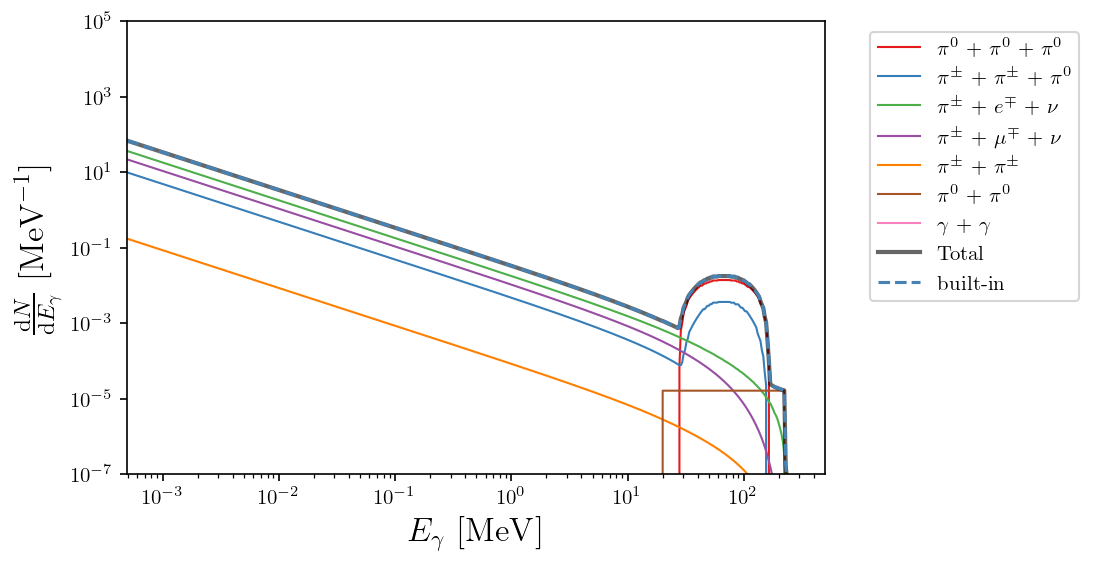

In [36]:
es = np.geomspace(long_kaon_procs.parent.mass * 1e-6, long_kaon_procs.parent.mass, 500)
dnde = dnde_photon(es, long_kaon_procs)
make_photon_spectrum_plot(es, dnde)
plt.plot(es, spectra.dnde_photon_long_kaon(es, long_kaon_procs.parent.mass), label="built-in", ls="--")
plt.ylim(1e-7, 1e5)
plt.legend(loc=0,bbox_to_anchor=(1.05,1))

In [16]:
del dnde["a a"]
header = "energy," + ",".join(list(map(lambda string: "_".join(string.split(" ")), dnde.keys())))
data = np.array([es,*dnde.values()]).T
np.savetxt(
    DATA_DIR.joinpath("long_kaon_photon.csv"), 
    data, 
    fmt="%.15e", 
    delimiter=",", 
    header=header,
)

## $\eta$

In [27]:
eta_procs = make_processes(eta, eta_processes)

/home/logan/github/Hazma/hazma/spectra/_photon/__init__.py:169: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return _pion.dnde_photon_charged_pion(photon_energy, pion_energy)


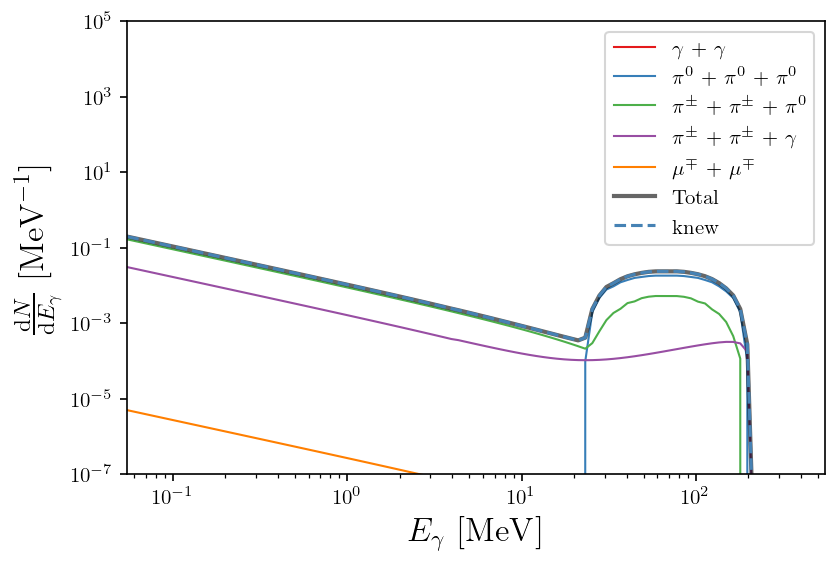

In [28]:
from scipy import interpolate

es = np.geomspace(eta.mass * 1e-4, eta.mass, 100)
dnde = dnde_photon(es, eta_procs)

proc = eta_procs.processes["pi pi a"]
_es, _ps = proc.energy_distributions[2]
dnde["pi pi a"] += proc.branching_fraction * interpolate.InterpolatedUnivariateSpline(_es, _ps, ext=1)(es)

make_photon_spectrum_plot(es, dnde)
plt.plot(es, spectra.dnde_photon_eta(es, eta_procs.parent.mass), label="knew", ls="--")
plt.ylim(1e-7, 1e5)
plt.legend()

In [10]:
header = "energy," + ",".join(list(map(lambda string: "_".join(string.split(" ")), dnde.keys())))
data = np.array([es,*dnde.values()]).T
np.savetxt(
    DATA_DIR.joinpath("eta_photon.csv"), 
    data, 
    fmt="%.15e", 
    delimiter=",", 
    header=header,
)

## $\omega$

In [29]:
omega_procs = make_processes(omega, omega_processes)

/home/logan/github/Hazma/hazma/spectra/_photon/__init__.py:169: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return _pion.dnde_photon_charged_pion(photon_energy, pion_energy)


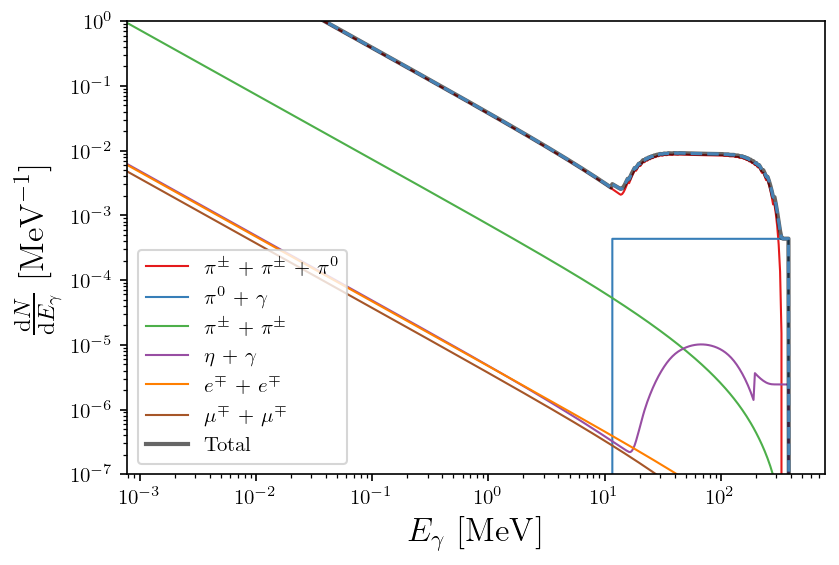

In [30]:
es = np.geomspace(omega.mass * 1e-6, omega.mass, 500)
dnde = dnde_photon(es, omega_procs)
make_photon_spectrum_plot(es, dnde)
plt.plot(es, spectra.dnde_photon_omega(es, omega.mass), label="builtin", ls="--")

In [10]:
header = "energy," + ",".join(list(map(lambda string: "_".join(string.split(" ")), dnde.keys())))
data = np.array([es, *dnde.values()]).T
np.savetxt(
    DATA_DIR.joinpath("omega_photon.csv"), 
    data, 
    fmt="%.15e", 
    delimiter=",", 
    header=header,
)

## $\eta'$

In [31]:
eta_prime_procs = make_processes(eta_prime, eta_prime_processes)

/home/logan/github/Hazma/hazma/spectra/_photon/__init__.py:169: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return _pion.dnde_photon_charged_pion(photon_energy, pion_energy)
/home/logan/.local/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:463: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


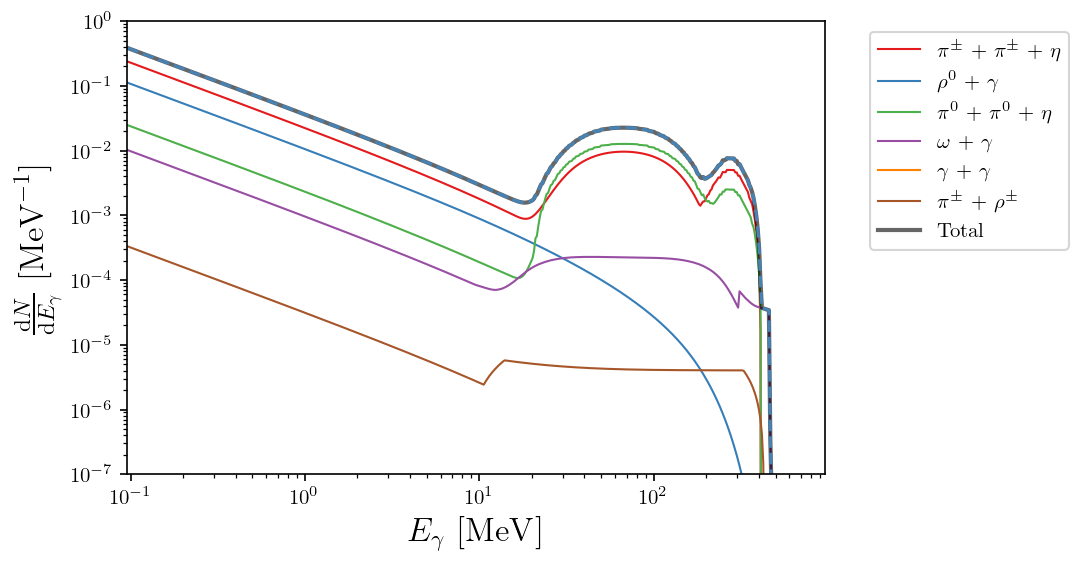

In [35]:
es = np.geomspace(eta_prime.mass * 1e-4, eta_prime.mass, 500)
dnde = dnde_photon(es, eta_prime_procs)
make_photon_spectrum_plot(es, dnde)
plt.plot(es, spectra.dnde_photon_eta_prime(es, eta_prime.mass),ls="--")
plt.legend(loc=0,bbox_to_anchor=(1.05, 1))

In [11]:
header = "energy," + ",".join(list(map(lambda string: "_".join(string.split(" ")), dnde.keys())))
data = np.array([es, *dnde.values()]).T
np.savetxt(
    DATA_DIR.joinpath("eta_prime_photon.csv"), 
    data, 
    fmt="%.15e", 
    delimiter=",", 
    header=header,
)

## $\phi$

In [33]:
phi_procs = make_processes(phi, phi_processes)

/home/logan/github/Hazma/hazma/spectra/_photon/__init__.py:169: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return _pion.dnde_photon_charged_pion(photon_energy, pion_energy)


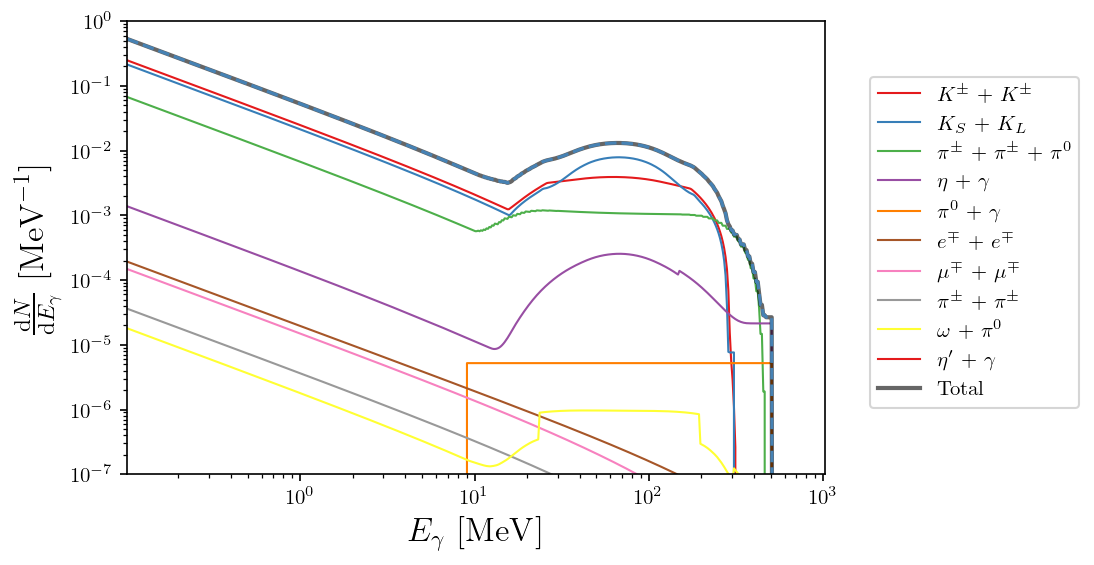

In [34]:
es = np.geomspace(phi.mass * 1e-4, phi.mass, 500)
dnde = dnde_photon(es, phi_procs)
make_photon_spectrum_plot(es, dnde)
plt.plot(es, spectra.dnde_photon_phi(es, phi.mass), ls="--")
plt.legend(loc=0, bbox_to_anchor=(1.05, 0.9))

In [33]:
header = "energy," + ",".join(list(map(lambda string: "_".join(string.split(" ")), dnde.keys())))
data = np.array([es, *dnde.values()]).T
np.savetxt(
    DATA_DIR.joinpath("phi_photon.csv"), 
    data, 
    fmt="%.15e", 
    delimiter=",", 
    header=header,
)

In [1]:
import numpy as np
from hazma.rambo import PhaseSpace

procs = make_processes(charged_kaon, charged_kaon_processes)
proc = procs.processes["pi pi pi"]

phase_space = PhaseSpace(charged_kaon.mass, masses=[p.mass for p in proc.final_states])
phase_space.energy_distributions(10_000, len(proc.energy_distributions[0][0]))